## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data_df=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mice_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [98]:
# Checking the number of mice.
number_of_mice = len(mice_data_df)
number_of_mice

1893

In [99]:
number_of_mice = mice_data_df['Mouse ID'].unique()
len(number_of_mice)

249

In [145]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_mice = mice_data_df.groupby('Drug Regimen')
duplicate_mice_df = group_mice[['Timepoint']].count()
duplicate_mice_df

,Timepoint,Mouse ID
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,161,161
Ramicane,228,228
Stelasyn,181,181


In [101]:
# Optional: Get all the data for the duplicate mouse ID. 



In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  
mice_data_df.sort_values("Mouse ID", inplace = True) 
clean_data_df = mice_data_df.drop_duplicates(subset = 'Mouse ID', keep = 'last') 
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
464,a251,Infubinol,Female,21,25,0,45.000000,0
474,a262,Placebo,Female,17,29,0,45.000000,0
493,a275,Ceftamin,Female,20,28,45,62.999356,3
495,a366,Stelasyn,Female,16,29,5,48.951368,0
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
76,z578,Ramicane,Male,11,16,5,42.188787,0
1867,z581,Infubinol,Female,24,25,20,51.807944,2
1877,z795,Naftisol,Female,13,29,20,53.280657,1


In [142]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_data_df)

## Summary Statistics

In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Making a table with only Tumor Volume and Drug Regimen 
tumor_volume = clean_data_df[['Tumor Volume (mm3)','Drug Regimen']]
regimen_df = tumor_volume.groupby('Drug Regimen')

#Taking the mean of tumor volume 
tumor_mean['Tumor Mean'] = regimen_df.mean()

#Taking the median of tumor volume 
tumor_median['Tumor Median'] = regimen_df.median()

#Taking the Variance of tumor volume 
tumor_var['Tumor Variance'] = regimen_df.var()

#Taking the Standard Deviation of tumor volume 
tumor_std['Tumor Standard Deviation'] = regimen_df.std()

#Taking the SEM of tumor volume 
tumor_sem['Tumor SEM'] = regimen_df.sem()

#Merging into one summary table 
sum_data_df = pd.merge(tumor_mean, tumor_median, on='Drug Regimen', how='outer')

#Dropping unwanted columns 
sum_data_df = sum_data_df.drop(['Tumor Volume (mm3)_x'], axis=1)
sum_data_df = sum_data_df.drop(['Tumor Volume (mm3)_y'], axis=1)

#Merging into one summary table 
sum_data_df = pd.merge(sum_data_df, tumor_var, on='Drug Regimen', how='outer')
sum_data_df = pd.merge(sum_data_df, tumor_std, on='Drug Regimen', how='outer')
sum_data_df = pd.merge(sum_data_df, tumor_sem, on='Drug Regimen', how='outer')

#Dropping unwanted columns 
sum_data_df = sum_data_df.drop(['Tumor Volume (mm3)_x'], axis=1)
sum_data_df = sum_data_df.drop(['Tumor Volume (mm3)_y'], axis=1)
sum_data_df = sum_data_df.drop(['Tumor Volume (mm3)'], axis=1)

#Final Summary Table 
final_sum_data_df = sum_data_df.reset_index()
final_sum_data_df


,Drug Regimen,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
0,Capomulin,42.212714,45.000000,26.464559,5.144372,1.028874
1,Ceftamin,52.769195,50.701280,52.760513,7.263643,1.452729
2,Infubinol,51.243068,50.336553,33.853300,5.818359,1.163672
3,Ketapril,54.302915,50.659581,88.146614,9.388643,1.877729
4,Naftisol,52.128720,50.002314,56.703087,7.530145,1.506029
5,Placebo,51.010353,49.000125,42.911050,6.550653,1.310131
6,Propriva,50.549618,48.710661,38.379616,6.195128,1.239026
7,Ramicane,41.031254,41.714619,18.414583,4.291222,0.858244
8,Stelasyn,52.493550,51.522841,50.882939,7.133228,1.456064
9,Zoniferol,52.729100,49.934725,61.644001,7.851369,1.570274


## Bar and Pie Charts

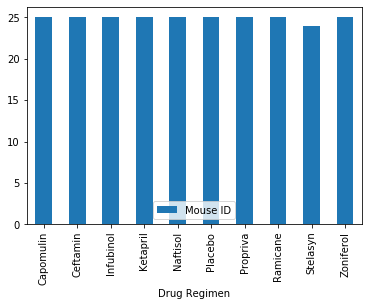

In [176]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_df = clean_data_df.groupby('Drug Regimen')
number_of_mice_df = mice_per_df.count()
number_of_mice_df = number_of_mice_df['Mouse ID']
mice_df = pd.merge(sum_data_df, number_of_mice_df, on = 'Drug Regimen') 
mice_df = mice_df.reset_index()

mice_df_df.plot(x = 'Drug Regimen', y = 'Mouse ID', kind='bar')

#mice_df.plot(x_value, y_value, kind='bar')


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
